In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# decide the data to use
USE_SIMPLE_DATA = False



In [3]:
import matplotlib
matplotlib.rc('font',family = 'PingFang HK')

# analyze the data after clustering

1. mulinoimal regression
2. explore relationship inside the cluster

## 1. mulinoimal regression

In [4]:
# Load the data
os.chdir('/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes')
df =  pd.read_csv('/processedData/simplify_tsneCluster.csv') if USE_SIMPLE_DATA else pd.read_csv('processedData/raw_tsneCluster.csv')

In [5]:
# cleaning the data
cleaned_df = df[[ '國文檢定_code', '英文檢定_code',
               '數學檢定_code',
               '社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率', '預定甄試人數',
               '甄試費用', '口試佔比', '書審佔比','unitier','cluster']]

In [6]:
# check the size of groups 
cleaned_df['cluster'].value_counts().sort_index()

cluster
1    517
2    248
3    107
4    340
5    425
6    238
7    279
Name: count, dtype: int64

In [7]:
X = pd.get_dummies(cleaned_df['cluster'])
basegroup = cleaned_df['cluster'].value_counts().sort_index().index.values[ cleaned_df['cluster'].value_counts().sort_index().argmax()]
X = X.drop(basegroup, axis=1).values

In [8]:
# liner regression
from sklearn.linear_model import LinearRegression

Ys = cleaned_df.drop(['cluster'], axis=1).values
intercepts = []
coefficients = []

for i in range(Ys.shape[1]):
    Y = Ys[:,i]
    reg = LinearRegression().fit(X, Y)
    print(cleaned_df.columns[i])
    print(reg.coef_)
    print(reg.intercept_)
    print('---------------------------------')
    intercepts.append(reg.intercept_)
    coefficients.append(reg.coef_)

國文檢定_code
[ -3.92767673 -18.65480215 -13.46576971  12.52070088  -4.58635795
  12.10950965]
20.85106382978725
---------------------------------
英文檢定_code
[-37.63059213 -34.67566297 -25.55867562 -10.07632268 -13.23346553
   4.9088344 ]
39.582205029013544
---------------------------------
數學檢定_code
[-40.18707494 -15.53384913 -27.95443736 -29.42090795 -39.70611804
   2.33711861]
40.53384912959385
---------------------------------
社會檢定_code
[ 0.96399045 -0.32305356  1.82362043 30.47538514  0.44714985 -0.43520309]
0.4352030947775791
---------------------------------
自然檢定_code
[-48.10951051 -47.80776948 -39.62046877 -48.27340994 -48.04651919
 -42.99615926]
48.50870406189553
---------------------------------
國文倍率
[-18.88063502   0.27283573   5.81516669 -10.65542155  -8.97685012
  -6.38892355]
23.890715667311397
---------------------------------
英文倍率
[16.98428433 17.60928433 17.02840198  4.5786961  -8.52096777 -4.34412069]
12.39071566731141
---------------------------------
數學倍率
[16.58683784 -9

In [9]:
# save the coef and intercept by csv
groups = cleaned_df['cluster'].value_counts().sort_index().index.values.tolist()
groups.remove(basegroup)
groups = ['group - ' + str(i) for i in groups]
columns = ['columns',f'intercept(group - {basegroup})']
columns.extend(groups)
params = pd.DataFrame(columns=columns)
for colname,intercep,coef in zip(cleaned_df.columns,intercepts, coefficients):
    params.loc[len(params)] = ([colname,intercep,*coef])
params.to_csv(f'results/multinomial_{"simp" if USE_SIMPLE_DATA else "raw"}.csv') 



## 2. explore relationship inside the cluster

In [10]:
# seperate the data by cluster
clustered_data = {}
for group in cleaned_df['cluster'].value_counts().sort_index().index.values:
    clustered_data[group] = cleaned_df[cleaned_df['cluster'] == group]

In [11]:
# columns needed analyzed
columnlist = ['國文檢定_code', '英文檢定_code','數學檢定_code','社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']
sieve1 = ['國文檢定_code', '英文檢定_code','數學檢定_code','社會檢定_code', '自然檢定_code']
sieve2 = ['國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']

In [12]:
# recode sive2 to minus
for col in sieve2:
    for idx,df_ in clustered_data.items():
        df_.loc[:,col] = -df_.loc[:,col]
cleaned_df[sieve2] = -cleaned_df[sieve2]

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_3431/2462664989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sieve2] = -cleaned_df[sieve2]


In [13]:
"""
from scipy.special import comb
import matplotlib

plt.subplots(int(comb(len(columnlist),2)),len(columnlist),figsize=(15,10),sharex=True,sharey=True)
matplotlib.rc('font',family = 'PingFang HK')
for x in range(len(columnlist)):
    for y in range(len(columnlist)):
        if y <= x :
            continue
        for idx,df_ in enumerate(clustered_data.values()):
            sns.kdeplot(df_, x=columnlist[x],y = columnlist[y], ax = plt.subplot(int(comb(len(columnlist),2)),len(columnlist),idx+1),fill=True,bw_adjust=0.8)
        print(f'{columnlist[x]} vs {columnlist[y]}')
plt.show()
"""

"\nfrom scipy.special import comb\nimport matplotlib\n\nplt.subplots(int(comb(len(columnlist),2)),len(columnlist),figsize=(15,10),sharex=True,sharey=True)\nmatplotlib.rc('font',family = 'PingFang HK')\nfor x in range(len(columnlist)):\n    for y in range(len(columnlist)):\n        if y <= x :\n            continue\n        for idx,df_ in enumerate(clustered_data.values()):\n            sns.kdeplot(df_, x=columnlist[x],y = columnlist[y], ax = plt.subplot(int(comb(len(columnlist),2)),len(columnlist),idx+1),fill=True,bw_adjust=0.8)\n        print(f'{columnlist[x]} vs {columnlist[y]}')\nplt.show()\n"

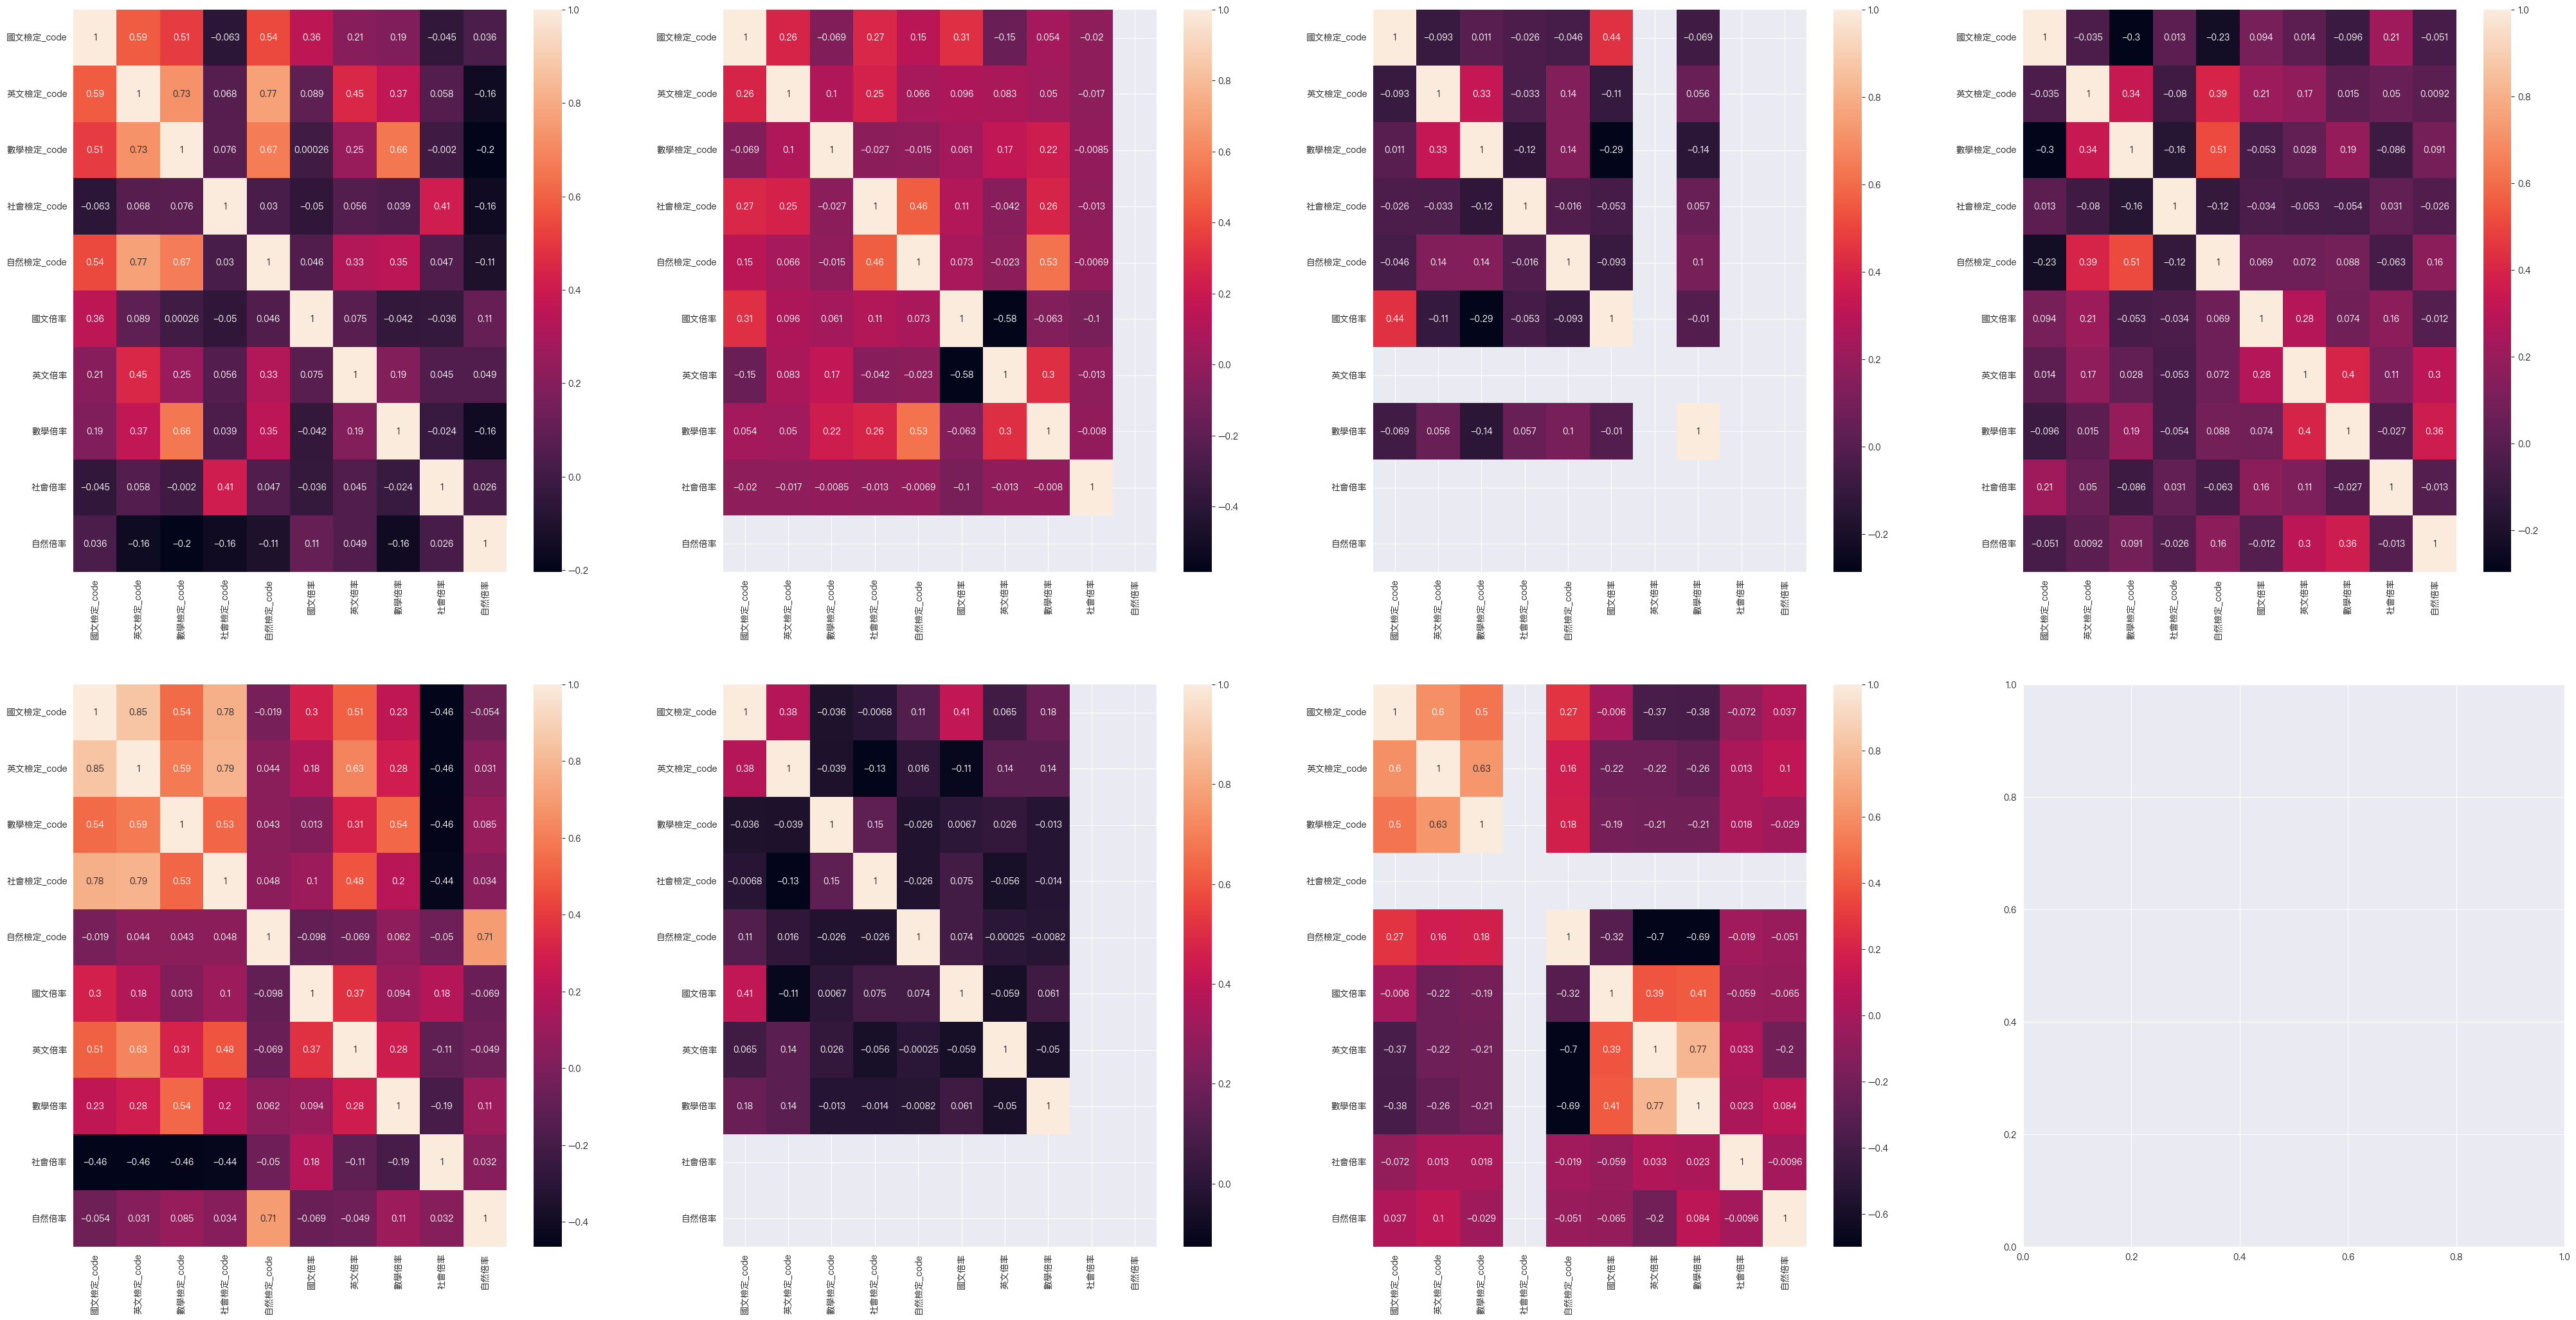

In [14]:
# show the correlation between columns
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(df_[columnlist].corr() ,annot=True)
plt.show()  

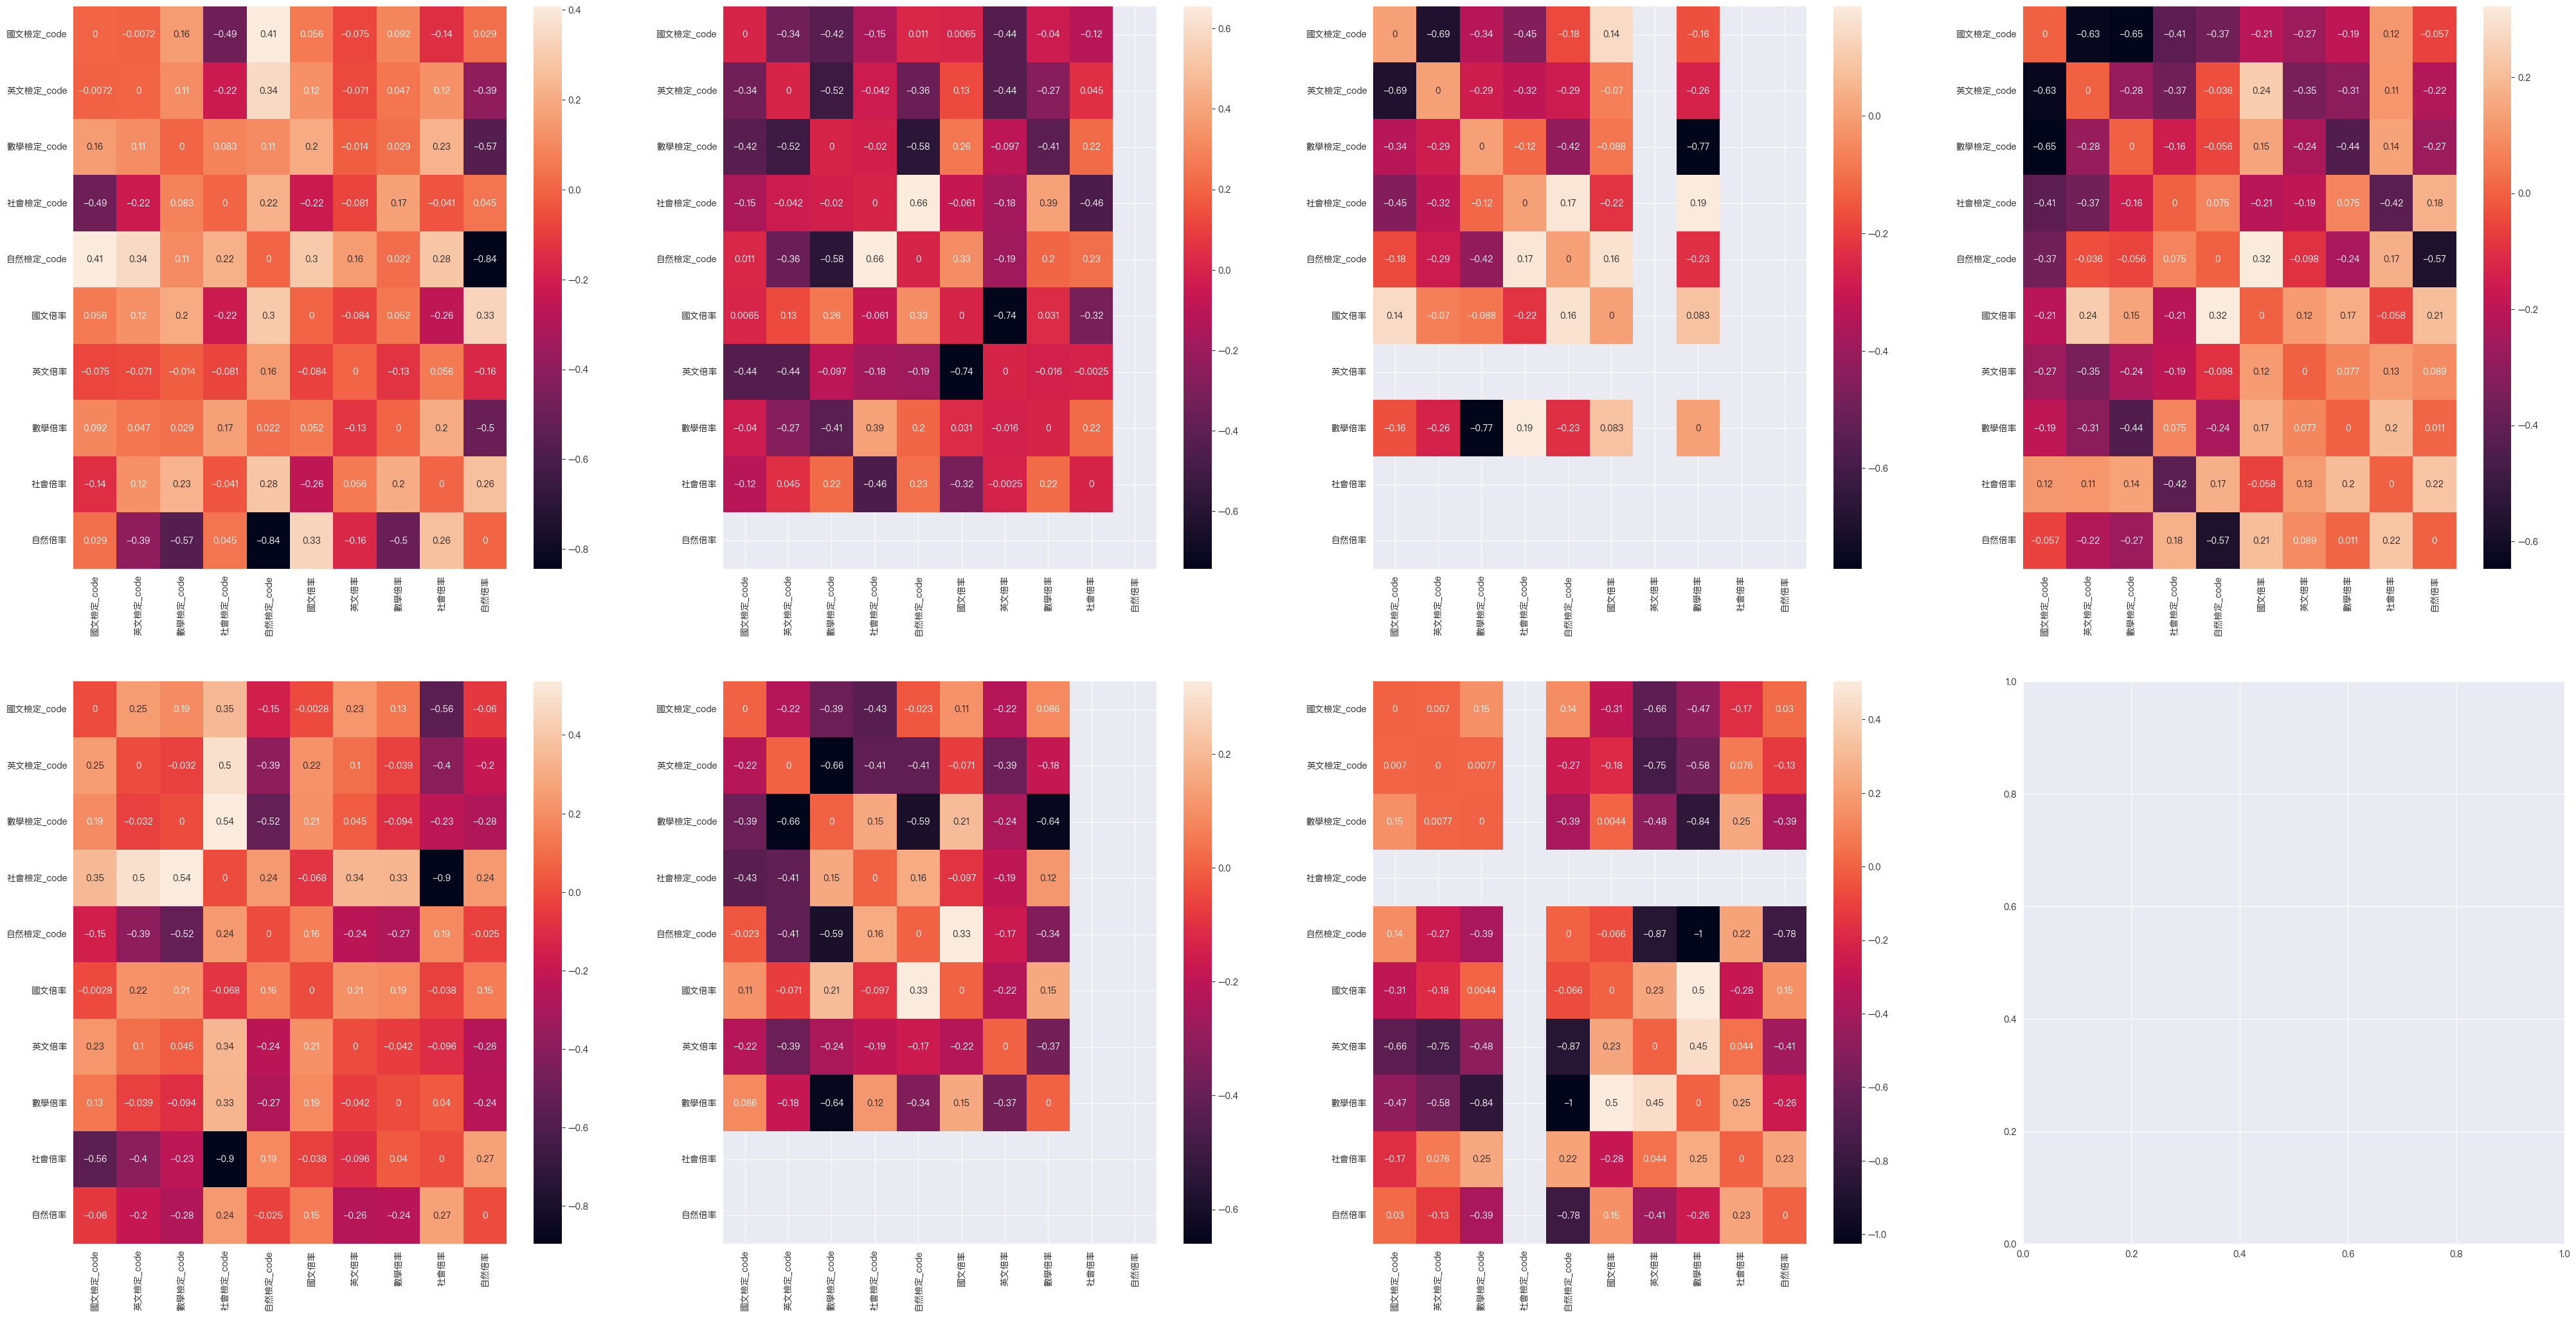

In [15]:
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(df_[columnlist].corr().values - cleaned_df[columnlist].corr() ,annot=True)
plt.show()

<Axes: >

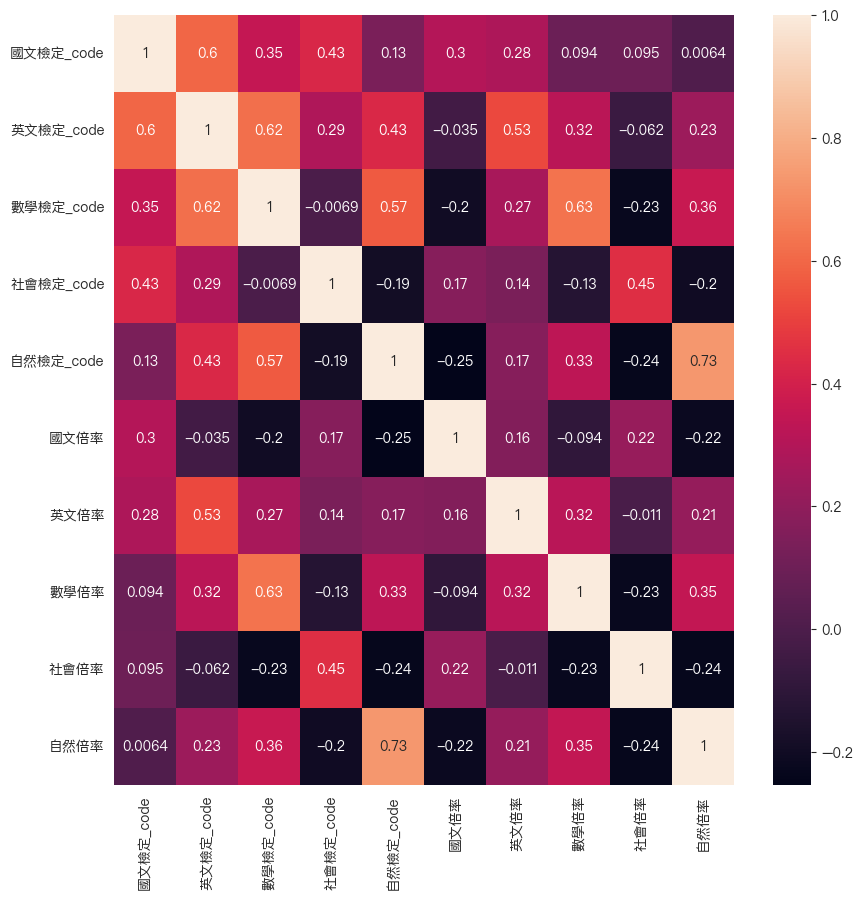

In [16]:
#base line corr
plt.subplots(1,1,figsize=(10,10))
sns.heatmap(cleaned_df[columnlist].corr(),annot=True)

In [17]:
cleaned_df.corr()

,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,自然倍率,預定甄試人數,甄試費用,口試佔比,書審佔比,unitier,cluster
國文檢定_code,1.000000,0.597245,0.350522,0.426614,0.134065,0.301066,0.284352,0.093574,0.095100,0.006400,-0.158968,0.299150,-0.119932,-0.097926,-0.064519,0.145346
英文檢定_code,0.597245,1.000000,0.621233,0.287976,0.429995,-0.034725,0.525061,0.319976,-0.062407,0.231737,-0.146963,0.415498,-0.253989,-0.076273,-0.102936,0.080706
數學檢定_code,0.350522,0.621233,1.000000,-0.006862,0.567919,-0.198997,0.267047,0.630843,-0.228226,0.361962,-0.110791,0.313792,-0.268799,0.027130,-0.074280,-0.127020
社會檢定_code,0.426614,0.287976,-0.006862,1.000000,-0.190522,0.171716,0.137456,-0.129045,0.451033,-0.201425,-0.121765,0.179627,-0.005197,-0.089564,0.008649,0.186442
自然檢定_code,0.134065,0.429995,0.567919,-0.190522,1.000000,-0.253375,0.169802,0.331454,-0.236777,0.731772,-0.067120,0.210381,-0.220880,0.027185,-0.093651,-0.567273
國文倍率,0.301066,-0.034725,-0.198997,0.171716,-0.253375,1.000000,0.159357,-0.093633,0.221201,-0.216986,-0.018595,-0.032887,0.160522,-0.101492,0.038517,0.122555
英文倍率,0.284352,0.525061,0.267047,0.137456,0.169802,0.159357,1.000000,0.319229,-0.010900,0.212150,-0.032823,0.264142,-0.124767,-0.165294,-0.047603,0.242519
數學倍率,0.093574,0.319976,0.630843,-0.129045,0.331454,-0.093633,0.319229,1.000000,-0.227349,0.347597,-0.008620,0.187783,-0.201816,-0.007686,-0.012239,-0.112616
社會倍率,0.095100,-0.062407,-0.228226,0.451033,-0.236777,0.221201,-0.010900,-0.227349,1.000000,-0.236140,-0.063733,-0.046498,0.150281,-0.052586,0.043645,0.245221
自然倍率,0.006400,0.231737,0.361962,-0.201425,0.731772,-0.216986,0.212150,0.347597,-0.236140,1.000000,-0.026562,0.128880,-0.187676,0.007416,-0.076128,-0.711596


# Use PCA to each cluster

In [18]:
from sklearn.decomposition import PCA

In [19]:
for idx,df_ in enumerate(clustered_data.values()):
    pca = PCA(n_components=2)
    X = df_[columnlist]
    pca.fit(X)
    print(f'group {list(clustered_data.keys())[idx]}')
    print(pca.components_)
    print('---------------------------------')

group 1
[[ 4.29193424e-01  5.41828149e-01  5.65933787e-01  4.33755049e-03
   4.21026454e-01  2.84156910e-02  8.81653001e-02  1.25764648e-01
   5.12353116e-04 -1.59543040e-02]
 [ 8.14836998e-01 -6.39770656e-02 -4.63150768e-01 -3.26552122e-02
  -6.36822655e-02  2.27468466e-01 -1.75725405e-02 -2.38227441e-01
  -3.99987756e-03  5.91452812e-02]]
---------------------------------
group 2
[[ 9.73007181e-01  1.49229036e-01 -1.00501358e-02  1.54440329e-01
   4.31625181e-02  6.46019692e-02 -2.91947672e-02  1.20561895e-02
  -8.92985838e-04  0.00000000e+00]
 [-2.17116415e-01  6.37340495e-01  3.28717613e-02  7.04167185e-01
   1.97152101e-01 -7.06272273e-03  4.91183570e-02  9.16146970e-02
  -9.37878368e-04 -0.00000000e+00]]
---------------------------------
group 3
[[-0.02673945  0.38060521  0.90367597 -0.0060265   0.0347135  -0.19111063
  -0.         -0.00545858 -0.         -0.        ]
 [-0.07219834  0.92087409 -0.37162563  0.00300566  0.02019268  0.09003698
   0.          0.01221723  0.          

# Find the rank inside the cluster will effect the competition in the cluster 
## 1. Find the main first stage sieve in each cluster
## 2. compute the correlation between the main sieve rank and the inside/outside competition 


In [20]:
rankdf = pd.read_csv("/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/tempdata/raw_in_out_cluster.csv")

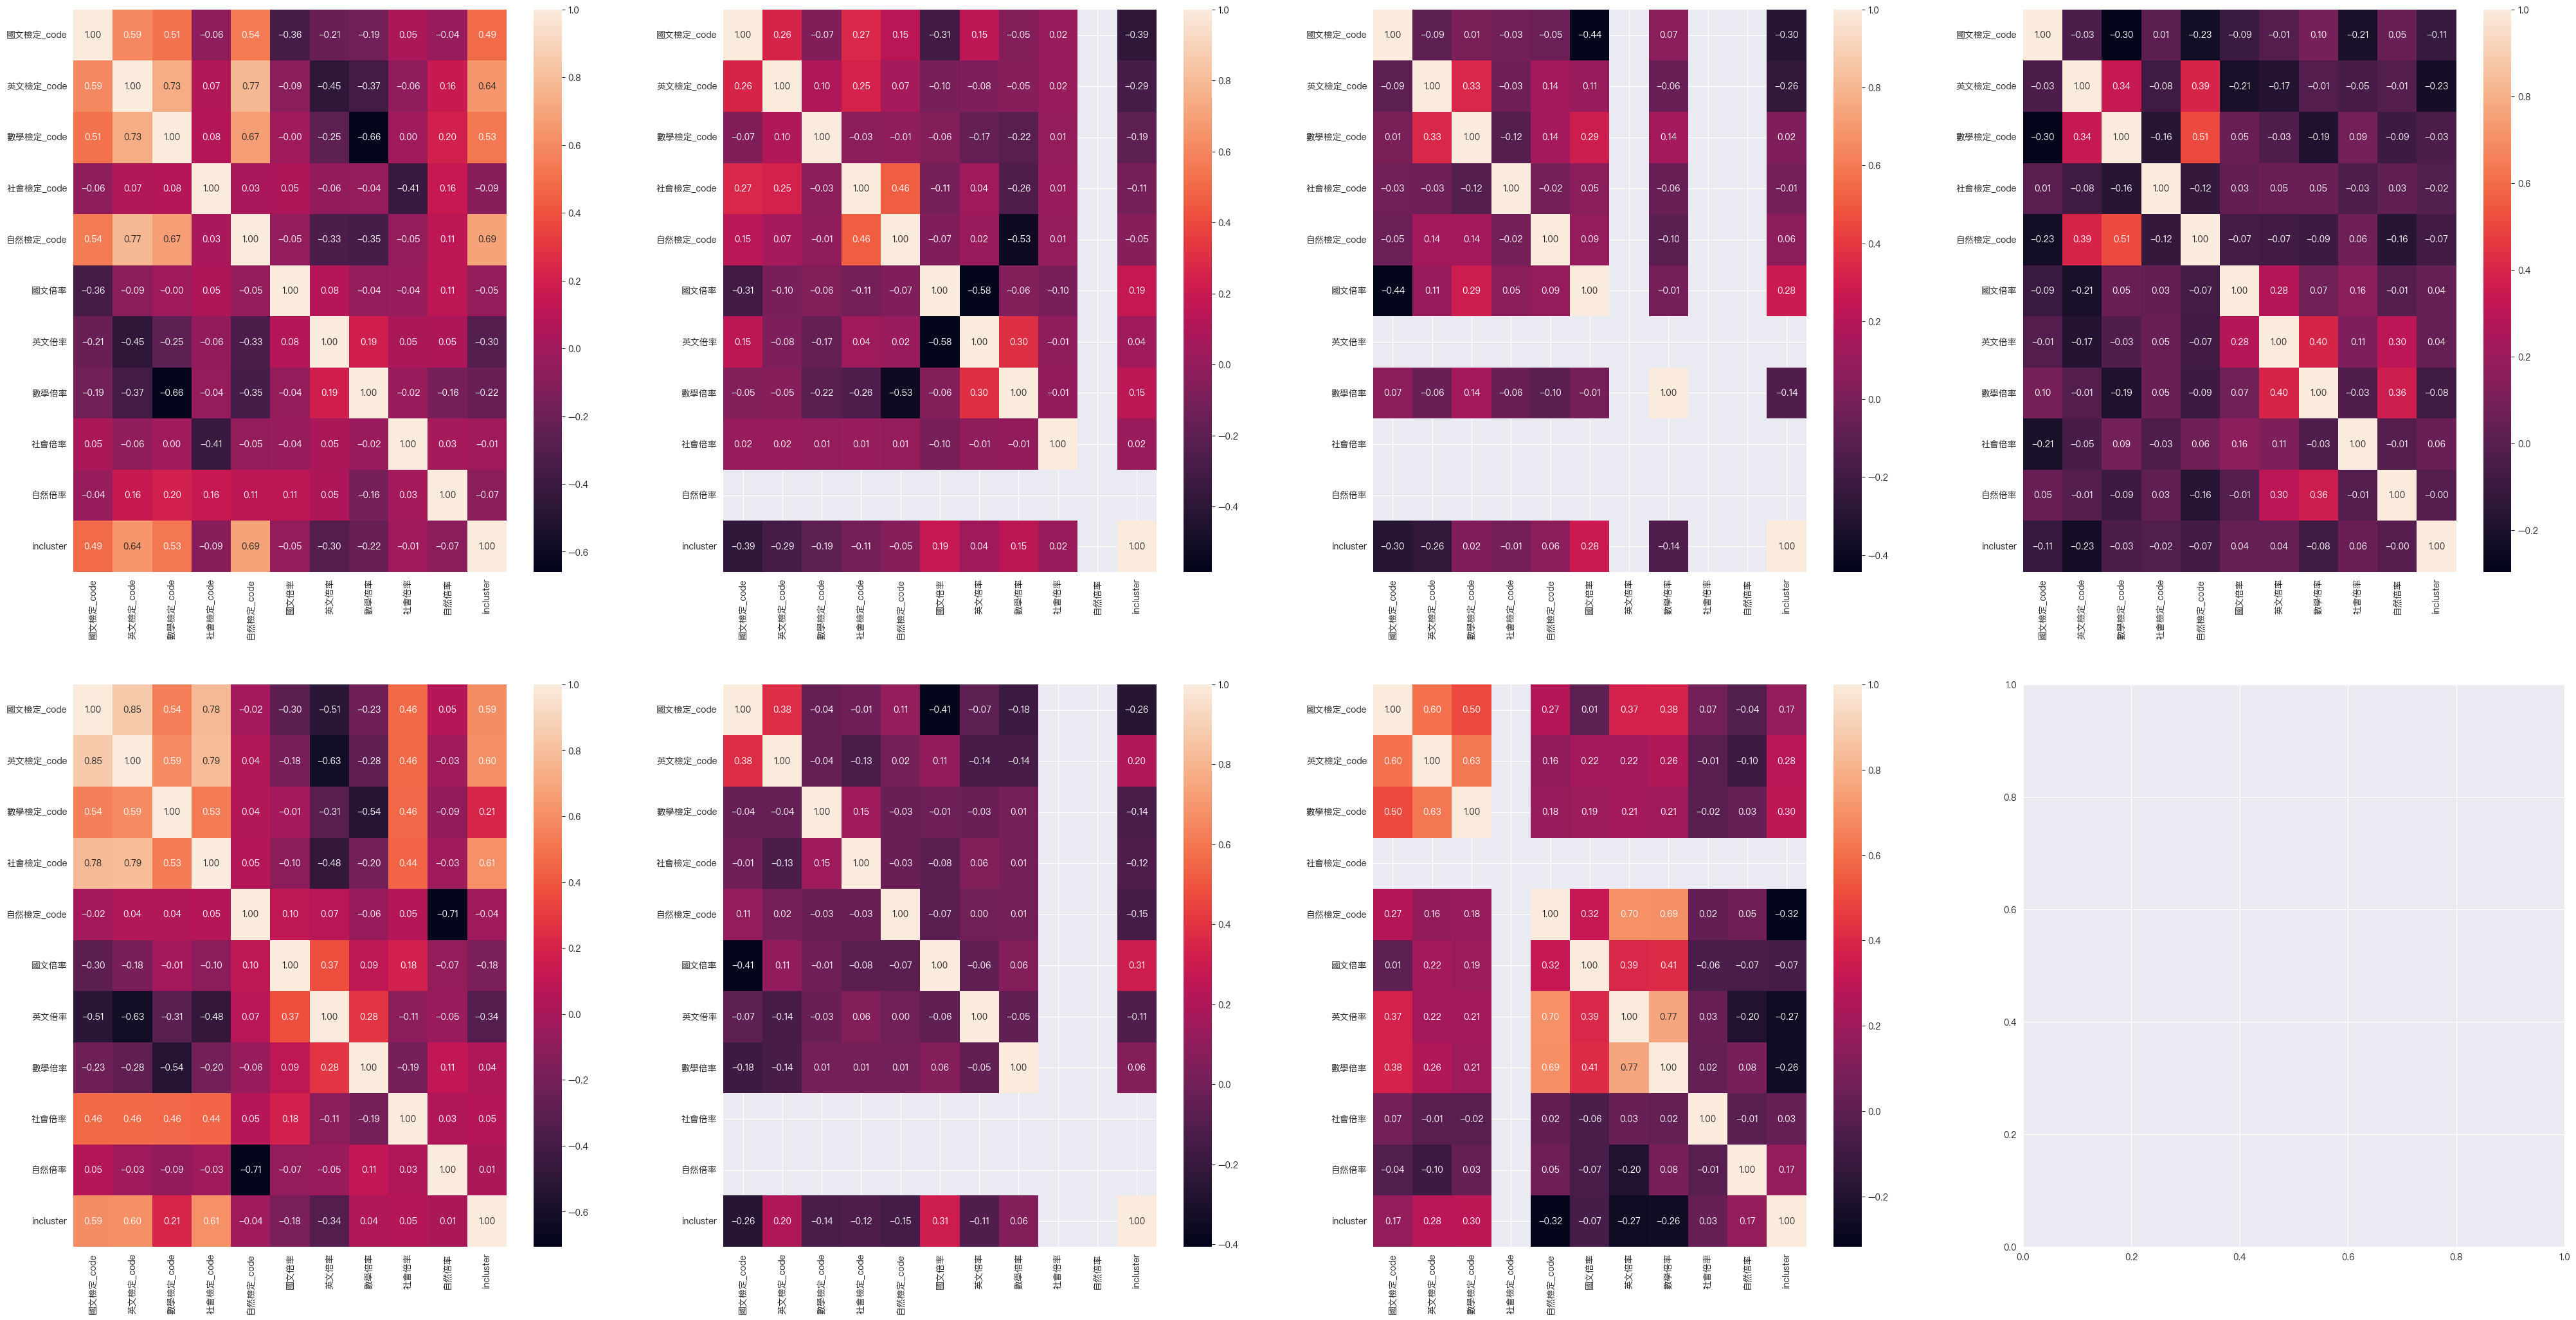

In [21]:
temp = columnlist.copy()
temp.append('incluster')
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(rankdf[rankdf['cluster'] == idx+1][temp].corr(),annot=True,fmt=".2f")
plt.show()

In [22]:
# find the main sieve
"""
for idx,df_ in enumerate(clustered_data.values()):
    print(f'group {idx+1}')
    for col in columnlist:
        print(f"{col} : {(df_[columnlist].mean() - cleaned_df[columnlist].mean()).abs()/(cleaned_df[columnlist].std())}")
"""
#find the main sieve by mean      
mainsievesByMean = dict()
for idx,df_ in enumerate(clustered_data.values()):
    mainsievesByMean[idx+1] = ((df_[columnlist].mean() - cleaned_df[columnlist].mean()).abs()/(cleaned_df[columnlist].std())).nlargest(2).index.values

#find the main sieve by var
mainsievesByVar = dict()
for idx,df_ in enumerate(clustered_data.values()):
    mainsievesByVar[idx+1] = (df_[columnlist].var()/(cleaned_df[columnlist].var())).nlargest(2).index.values

#find the main sieve by assigment
mainsievesByAssigment = {
    # set the main sieve
    1:["數學檢定_code","自然檢定_code"],
    2:["國文檢定_code","社會檢定_code"],
    3:["數學倍率","國文倍率"],
    4:["自然檢定_code","數學檢定_code"],
    5:["英文檢定_code","社會檢定_code"],
    6:["英文檢定_code","國文檢定_code"],
    7:["數學檢定_code","國文檢定_code"],
}

In [23]:
for _ in mainsievesByMean:
    print(mainsievesByMean[_])
print("-"*20,
      "\n")
for _ in mainsievesByVar:
    print(mainsievesByVar[_])
print("-"*20,
      "\n")
for _ in mainsievesByAssigment:
    print( mainsievesByAssigment[_])

['自然倍率' '自然檢定_code']
['國文倍率' '英文倍率']
['數學倍率' '英文倍率']
['英文倍率' '國文倍率']
['社會倍率' '社會檢定_code']
['英文倍率' '數學倍率']
['數學倍率' '數學檢定_code']
-------------------- 

['數學檢定_code' '國文檢定_code']
['國文檢定_code' '社會檢定_code']
['國文倍率' '數學檢定_code']
['自然檢定_code' '數學檢定_code']
['社會檢定_code' '國文檢定_code']
['國文倍率' '國文檢定_code']
['國文檢定_code' '國文倍率']
-------------------- 

['數學檢定_code', '自然檢定_code']
['國文檢定_code', '社會檢定_code']
['數學倍率', '國文倍率']
['自然檢定_code', '數學檢定_code']
['英文檢定_code', '社會檢定_code']
['英文檢定_code', '國文檢定_code']
['數學檢定_code', '國文檢定_code']


In [24]:
# generate the rank of the main sieves
#rankdf = pd.read_csv(f"./analyzeCodes/tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster")

rankdf[sieve2] = -rankdf[sieve2]
clustered_rank_df = dict()
for idx in range(1,8):
    clustered_rank_df[idx] = rankdf[rankdf['cluster'] == idx]
    clustered_rank_df[idx] = clustered_rank_df[idx][[ '學系代碼','國文檢定_code', '英文檢定_code',
                                                      '數學檢定_code',
                                                      '社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']]
    for col in columnlist:
        clustered_rank_df[idx][col] = clustered_rank_df[idx][col].rank(pct= True)




sieve1rankByMean = []
sieve2rankByMean = []
sieve1rankByVar = []
sieve2rankByVar = []
sieve1rankByAssigment = []
sieve2rankByAssigment = []


for id,row in rankdf.iterrows():
    
    idx = row['cluster']
    sieve1rankByMean.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByMean[idx][0]]._values[0])
    sieve2rankByMean.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByMean[idx][1]]._values[0])
    sieve1rankByVar.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByVar[idx][0]]._values[0])
    sieve2rankByVar.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByVar[idx][1]]._values[0])
    sieve1rankByAssigment.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByAssigment[idx][0]]._values[0])
    sieve2rankByAssigment.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByAssigment[idx][1]]._values[0])
rankdf['main_sieve1_bymean_rank'] = sieve1rankByMean
rankdf['main_sieve2_bymean_rank'] = sieve2rankByMean
rankdf['main_sieve1_byvar_rank'] = sieve1rankByVar
rankdf['main_sieve2_byvar_rank'] = sieve2rankByVar
rankdf['main_sieve1_byassigment_rank'] = sieve1rankByAssigment
rankdf['main_sieve2_byassigment_rank'] = sieve2rankByAssigment

       

# do some regression to find the relationship between the rank and the competition

In [25]:
rankdf[sieve2] = -rankdf[sieve2]
rankdf.to_csv(f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster_with_sieve.csv")

In [29]:
# over all data regression
import statsmodels.api as sm
X = rankdf[['main_sieve1_bymean_rank','main_sieve2_bymean_rank','main_sieve1_byvar_rank','main_sieve2_byvar_rank','main_sieve1_byassigment_rank','main_sieve2_byassigment_rank']]
Y = rankdf['incluster']

X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              incluster   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     65.41
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           9.27e-75
Time:                        17:51:06   Log-Likelihood:                 386.37
No. Observations:                2123   AIC:                            -758.7
Df Residuals:                    2116   BIC:                            -719.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [33]:
# seperate the data by cluster
clustered_rank_data = {}
for group in rankdf['cluster'].value_counts().sort_index().index.values:
    clustered_rank_data[group] = rankdf[rankdf['cluster'] == group]

for idx,data in enumerate( clustered_rank_data.values()):
    X = data[['main_sieve1_bymean_rank','main_sieve2_bymean_rank','main_sieve1_byvar_rank','main_sieve2_byvar_rank','main_sieve1_byassigment_rank','main_sieve2_byassigment_rank']]
    Y = data['incluster']
    X = sm.add_constant(X)
    model = sm.OLS(Y,X,missing='drop')
    results = model.fit()
    print(idx+1,"group",end = "\n ")
    print('missing number:', len(Y) - len(results.fittedvalues))
    print(results.summary())
    
for data in clustered_rank_data.values():
    X = data['main_sieve1_byassigment_rank']
    Y = data['incluster']
    X = sm.add_constant(X)
    model = sm.OLS(Y,X,missing='drop')
    results = model.fit()
    print(results.summary())

1 group
 missing number: 4
                            OLS Regression Results                            
Dep. Variable:              incluster   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.33e-79
Time:                        17:55:07   Log-Likelihood:                 293.13
No. Observations:                 513   AIC:                            -576.3
Df Residuals:                     508   BIC:                            -555.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [126]:
import jieba
jieba.load_userdict('./dict.txt')


clustered_word_feq = dict()

for idx,df_ in enumerate(clustered_rank_data.values()):
    wordlists = []
    departmeantlist = df_['學系名稱_trim'].values
    for dep in departmeantlist:
        wordlists.extend(jieba.lcut_for_search(dep,HMM=True))
    wordset = set(wordlists)
    freq = [ wordlists.count(word)/len(departmeantlist) for word in wordset]
    clustered_word_feq[idx+1] = pd.DataFrame({'word':list(wordset),'freq':freq}).sort_values('freq',ascending=False)
    
    
        
        

In [127]:
clustered_word_feq[1]

,word,freq
290,學系,0.893617
109,工程,0.342360
273,生物,0.141199
20,組,0.133462
38,(,0.131528
...,...,...
154,水土,0.001934
156,牙體,0.001934
157,計算,0.001934
158,水產養殖,0.001934


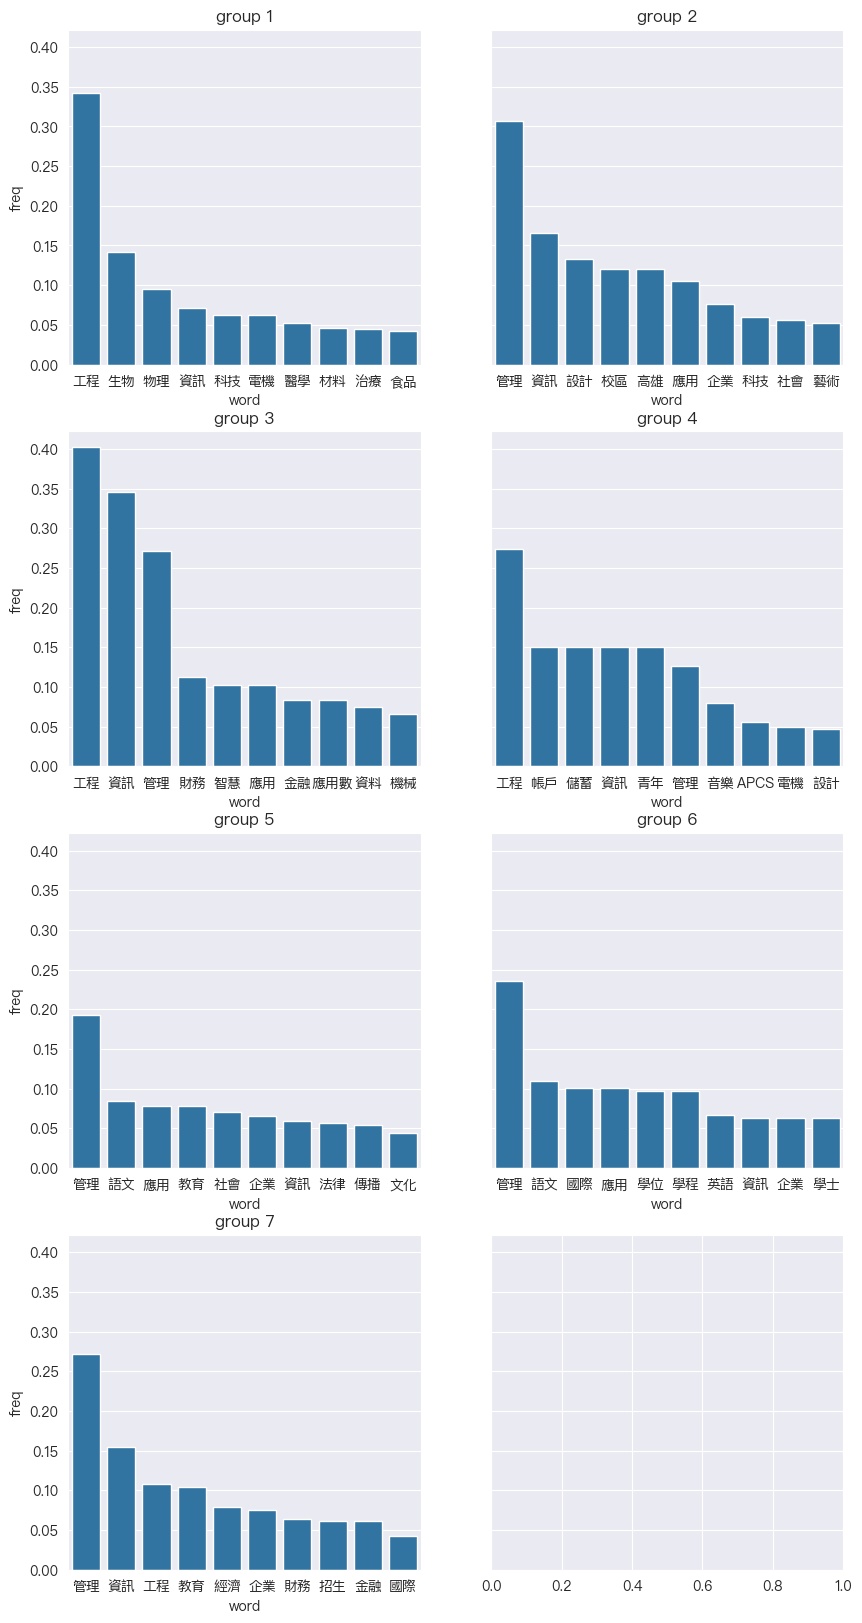

In [128]:
# draw the top 10 word in each cluster
plt.subplots(4,2,figsize=(10,20),sharey=True)
for idx,df_ in enumerate(clustered_word_feq.values()):
    plt.subplot(4,2,idx+1)
    dftemp = df_.copy()
    dftemp = dftemp.drop(dftemp[dftemp['word'].str.len() < 2].index)
    dftemp = dftemp.drop(dftemp[dftemp['word'] == ('學系' or '(' or ')' or '組' or '與' or '校區' or '高雄')].index)
    plt.title(f'group {idx+1}')
    sns.barplot(x='word',y='freq',data=dftemp[:10])

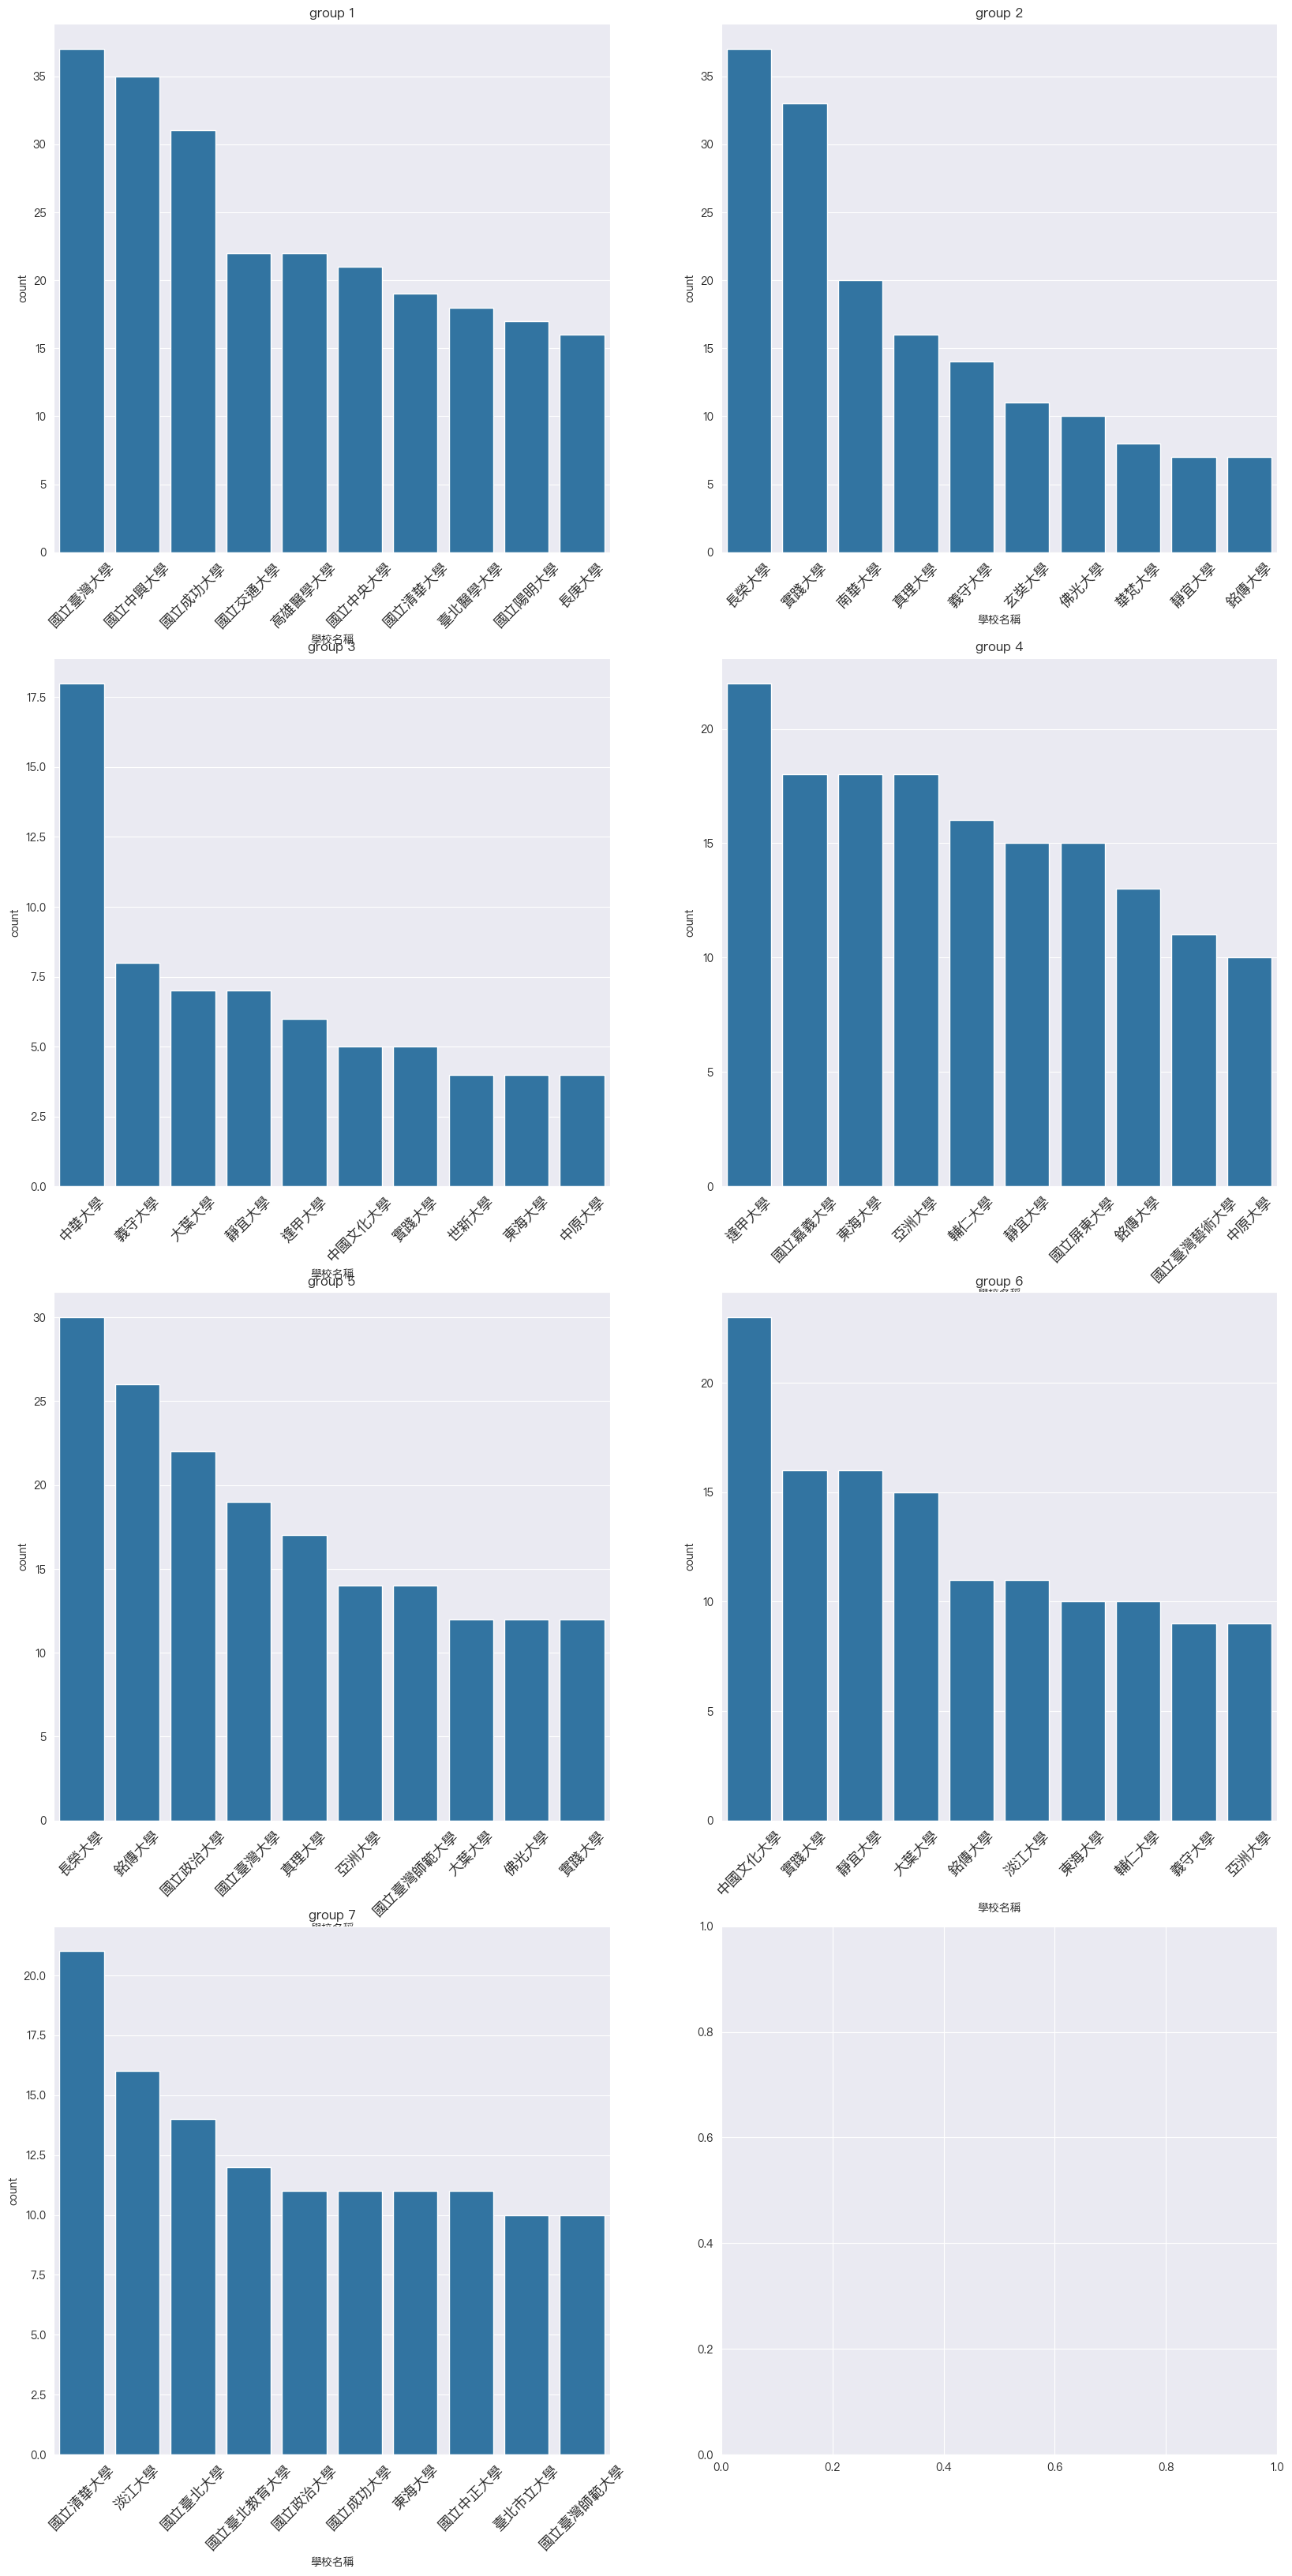

In [119]:
# draw the top 10 college in each cluster
plt.subplots(4,2,figsize=(20,40))
for idx,df_ in enumerate(clustered_rank_data.values()):
    plt.subplot(4,2,idx+1)
    frq = df_['學校名稱_encoded'].value_counts()
    frq = pd.DataFrame({'學校名稱':frq.index,'count':frq.values})
    sns.barplot(x='學校名稱',y='count',data=frq[:10])
    plt.title(f'group {idx+1}')
    plt.xticks(fontsize=13,rotation=45)

In [101]:
clustered_rank_data[3]['學校名稱_encoded'].value_counts()

學校名稱_encoded
中華大學        18
義守大學         8
大葉大學         7
靜宜大學         7
逢甲大學         6
中國文化大學       5
實踐大學         5
世新大學         4
東海大學         4
中原大學         4
國立東華大學       4
銘傳大學         3
淡江大學         3
國立中山大學       2
國立臺灣海洋大學     2
中信金融管理學院     2
大同大學         2
國立高雄師範大學     2
輔仁大學         2
東吳大學         1
國立聯合大學       1
慈濟大學         1
國立臺南大學       1
國立高雄大學       1
真理大學         1
國立清華大學       1
國立臺灣大學       1
國立臺東大學       1
國立臺中教育大學     1
國立屏東大學       1
國立嘉義大學       1
國立政治大學       1
國立成功大學       1
長榮大學         1
長庚大學         1
元智大學         1
Name: count, dtype: int64